# Analysis of the no. of wires in the data

In [ ]:
import pandas as pd
import shutil
import os

path = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\5 Layer Binary UNET\\Dataset\\output\\Skeletonized_976'

one_wire = 0
two_wires = 0
three_wires = 0
four_wires = 0
five_wires = 0
Multi_wires = 0

for file in os.listdir(path):
    if file.endswith('.csv'):
        filename = os.fsdecode(file)
        cells = pd.read_csv(path+'\\'+filename, sep='\t', header=None , engine = 'python')
        if len(cells) == 1:
            filename = filename.replace('.raw.csv' , '.PNG')
#             shutil.copy(path+'\\'+filename, "C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\trial\\Images\\1wire")
            one_wire += 1
        elif len(cells) == 2:
            filename = filename.replace('.raw.csv' , '.PNG')
#             shutil.copy(path+'\\'+filename, "C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\trial\\Images\\2wire")
            two_wires += 1
        elif len(cells) == 3:
            filename = filename.replace('.raw.csv' , '.PNG')
#             shutil.copy(path+'\\'+filename, "C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\trial\\Images\\3wire")
            three_wires += 1
        elif len(cells) == 4:
            filename = filename.replace('.raw.csv' , '.PNG')
#             shutil.copy(path+'\\'+filename, "C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\trial\\Images\\4wire")
            four_wires += 1
        elif len(cells) == 5:
            filename = filename.replace('.raw.csv' , '.PNG')
#             shutil.copy(path+'\\'+filename, "C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\trial\\Images\\5wire")
            five_wires += 1
        elif len(cells) > 5:
            filename = filename.replace('.raw.csv' , '.PNG')
#             shutil.copy(path+'\\'+filename, "C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\trial\\Images\\Multi_wire")
            Multi_wires += 1

d = {'#Wires' : ['1 Wire' , '2 Wires' , '3 Wires' , '4 Wires' , '5 Wires' , 'Multiple_Wires'] , 
     '#Images' : [one_wire, two_wires, three_wires, four_wires, five_wires , Multi_wires]}

df = pd.DataFrame(data = d)

df.plot(x='#Wires', y='#Images', kind='bar')

In [ ]:
import pandas as pd
import shutil
import os

path = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\5 Layer Binary UNET\\Dataset\\output\\predictions\\predictions'

for file in os.listdir(path):
    if file.endswith('.PNG'):
        filename = os.fsdecode(file)
        filename = filename.replace(".PNG", ".raw.csv")
        shutil.copy('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\5 Layer Binary UNET\\Dataset\\Images\\'+filename, path)

# Analysis of the wire/background ratio

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

mask_path = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Masks'
Background_wire_ratio = []
os.listdir(mask_path)
for file in os.listdir(mask_path):
    filename = os.fsdecode(file)
    img = cv2.imread(mask_path+'\\'+filename , 0)
    b,w = 0,0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == 255:
                w += 1
            elif img[i,j] == 0:
                b += 1
    ratio = (w/b)
    Background_wire_ratio.append(ratio)

df = pd.DataFrame(Background_wire_ratio)
plt.style.use('ggplot')
plt.hist(df, density=False, bins=len(os.listdir(mask_path)))  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Wire/Background Ratio');

In [ ]:
from torchvision.io import read_image
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import albumentations as A
import random

image_path = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Images'
mask_path = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Images'

image = read_image(image_path)
mask = read_image(mask_path)

def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)
        
print(image.shape, mask.shape)
original_height, original_width = image.shape[:2]
visualize(image,mask)

In [ ]:
aug_h = A.HorizontalFlip(p=1)
augmented_h = aug_h(image=image, mask=mask)

aug_v = A.VerticalFlip(p=1)
augmented_v = aug_v(image=image, mask=mask)

image_h = augmented_h['image']
mask_h = augmented_h['mask']

image_v = augmented_v['image']
mask_v = augmented_v['mask']

visualize(image_h, mask_h, image_v, mask_v)

In [ ]:
import torch
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

model

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, axs = plt.subplots(nrows=5, ncols=2)
print(axs.shape)
axs

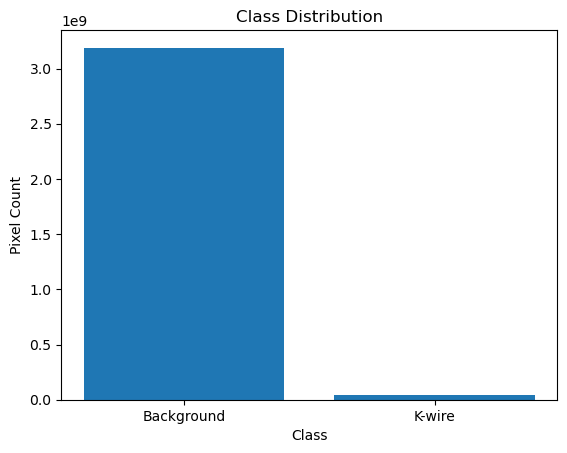

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

# List of class names
class_names = ['Background', 'K-wire']

# Folder containing the masks
folder = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\5 Layer Binary UNET\\Dataset\\Masks'
# Read masks from the folder and convert them to arrays
masks = []
for filename in os.listdir(folder):
    mask = cv2.imread(folder+'\\'+filename, 0)
    mask = mask.astype(float) / 255
    masks.append(mask)

# Calculate class distribution
class_counts = np.zeros(len(class_names))
for mask in masks:
    unique, counts = np.unique(mask, return_counts=True)
    for cls, count in zip(unique, counts):
        class_counts[int(cls)] += count

# Plot class distribution
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Pixel Count')
plt.title('Class Distribution')
plt.show()

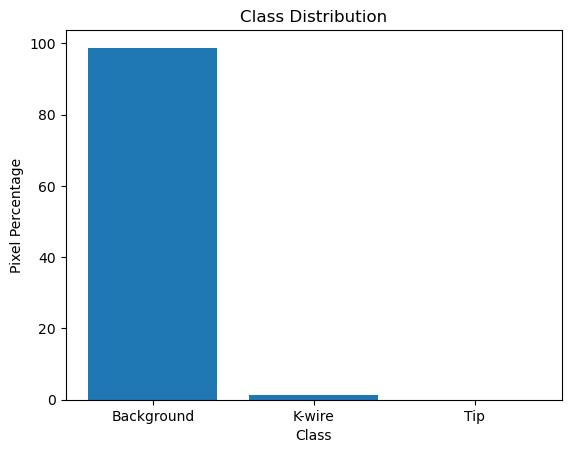

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import io

# List of class names
class_names = ['Background', 'K-wire', 'Tip']

# Folder containing the masks
folder = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Multi-class UNET\\Dataset\\Masks'

# Read masks from the folder and convert them to arrays
masks = []
for filename in os.listdir(folder):
    if filename.endswith('.PNG'):
        mask = cv2.imread(folder+'\\'+filename)
        masks.append(mask)

# Calculate class distribution
class_counts = np.zeros(len(class_names))
for mask in masks:
    unique, counts = np.unique(mask, return_counts=True)
    for cls, count in zip(unique, counts):
        class_counts[int(cls)] += count

# Calculate total number of pixels
total_pixels = np.sum(class_counts)

# Calculate class distribution in percentage
class_distribution = (class_counts / total_pixels) * 100

# Plot class distribution
plt.bar(class_names, class_distribution)
plt.xlabel('Class')
plt.ylabel('Pixel Percentage')
plt.title('Class Distribution')
plt.show()


In [6]:
class_distribution

array([9.87469612e+01, 1.23303180e+00, 2.00070332e-02])